In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [90]:
df_rainfall=pd.read_csv("D:\Rainfalls\weatherAUS.csv")
df_rainfall.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [91]:
df_rainfall.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [92]:
df_rainfall.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [15]:
# filling null values with mean which are objects and and float

In [93]:
col=['Evaporation','Sunshine','Cloud9am','Cloud3pm']
df_rainfall.drop(col,axis=1,inplace=True)

In [115]:
# Replace numerical columns with median
for col in df_rainfall.select_dtypes(['int','float64']):
        df_rainfall[col]=df_rainfall[col].fillna(df_rainfall[col].median())

In [116]:
for col in df_rainfall.select_dtypes('object'):
        df_rainfall[col]=df_rainfall[col].fillna(method='ffill')


In [117]:
df_rainfall

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,No,No


In [118]:
df_rainfall.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [119]:
df_rainfall['Date']=pd.to_datetime(df_rainfall['Date'])
df_rainfall['Year']=df_rainfall['Date'].dt.year.astype(int)
df_rainfall['Month']=df_rainfall['Date'].dt.month.astype(int)

df_rainfall['days']=df_rainfall['Date'].dt.day.astype(int)



In [121]:
df_rainfall.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
Year                      int32
Month                     int32
days                      int32
dtype: object

Text(0.5, 1.0, 'Rain Distribution In Each Month')

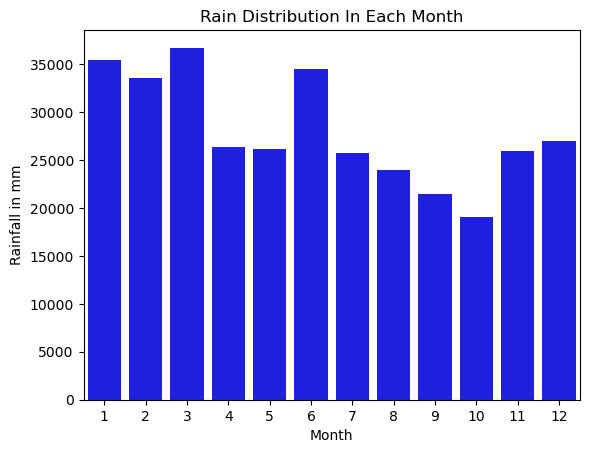

In [133]:
## rain fall vs month
rainfall=df_rainfall.groupby('Month')['Rainfall'].sum().reset_index()
sns.barplot(x='Month',y='Rainfall',data=rainfall,color='blue')
plt.ylabel('Rainfall in mm')
plt.title('Rain Distribution In Each Month')

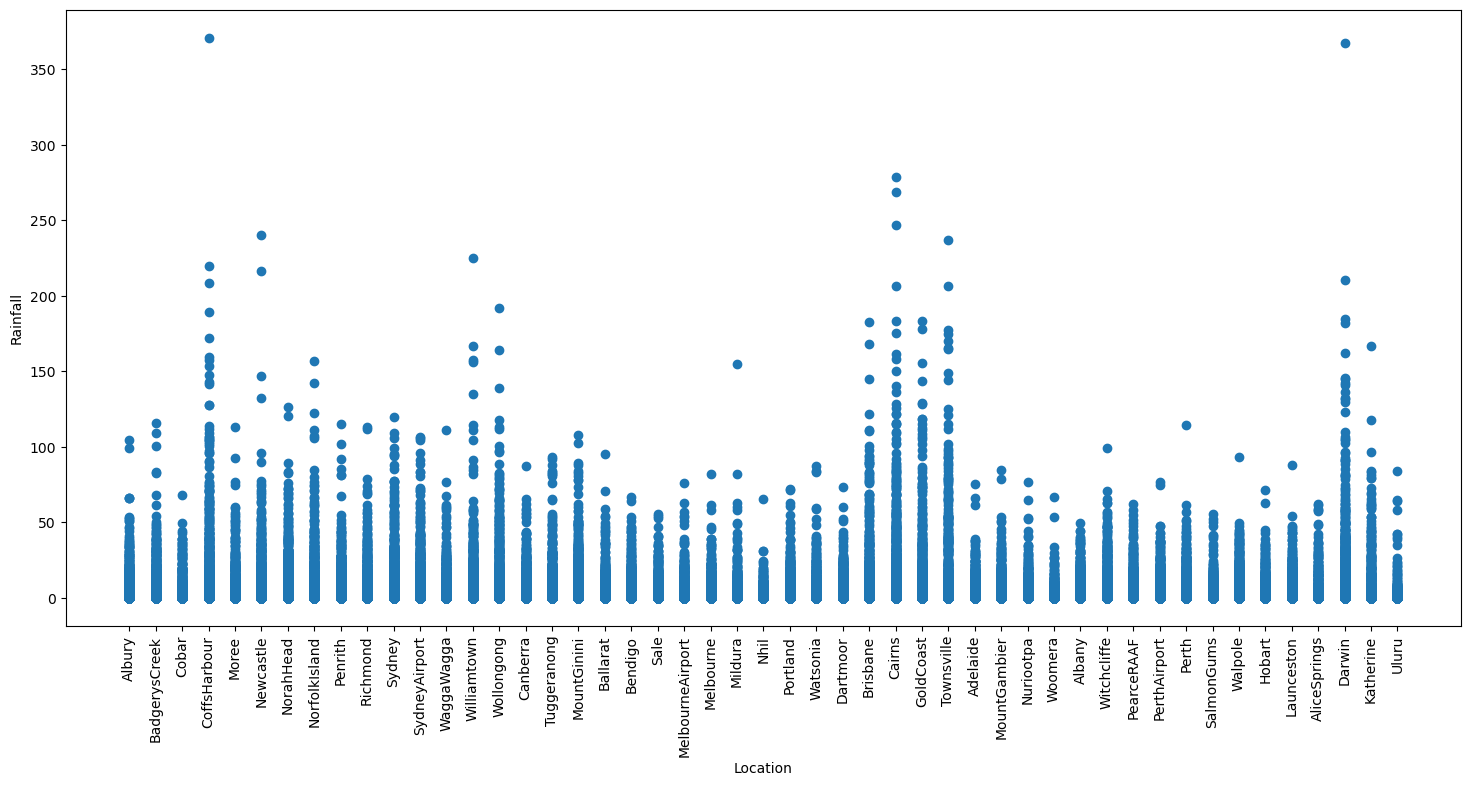

In [137]:
## Rainfall vs location
plt.figure(figsize=(18,8))
plt.scatter(df_rainfall['Location'],df_rainfall['Rainfall'])
plt.xlabel("Location")
plt.xticks(rotation=90)
plt.ylabel("Rainfall")
plt.show()


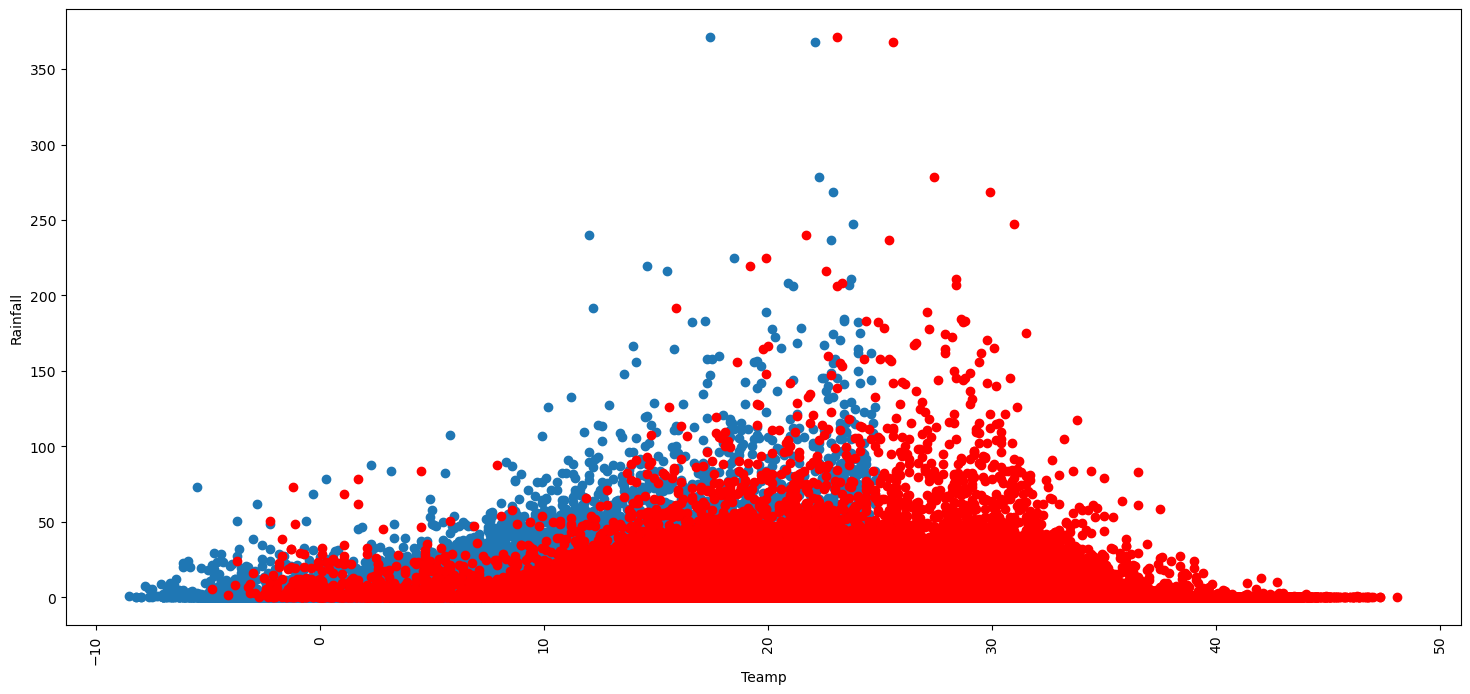

In [138]:
## Rainfall vs location
plt.figure(figsize=(18,8))
plt.scatter(df_rainfall['MinTemp'],df_rainfall['Rainfall'])
plt.scatter(df_rainfall['MaxTemp'],df_rainfall['Rainfall'],color='Red')
plt.xlabel("Teamp")
plt.xticks(rotation=90)
plt.ylabel("Rainfall")
plt.show()

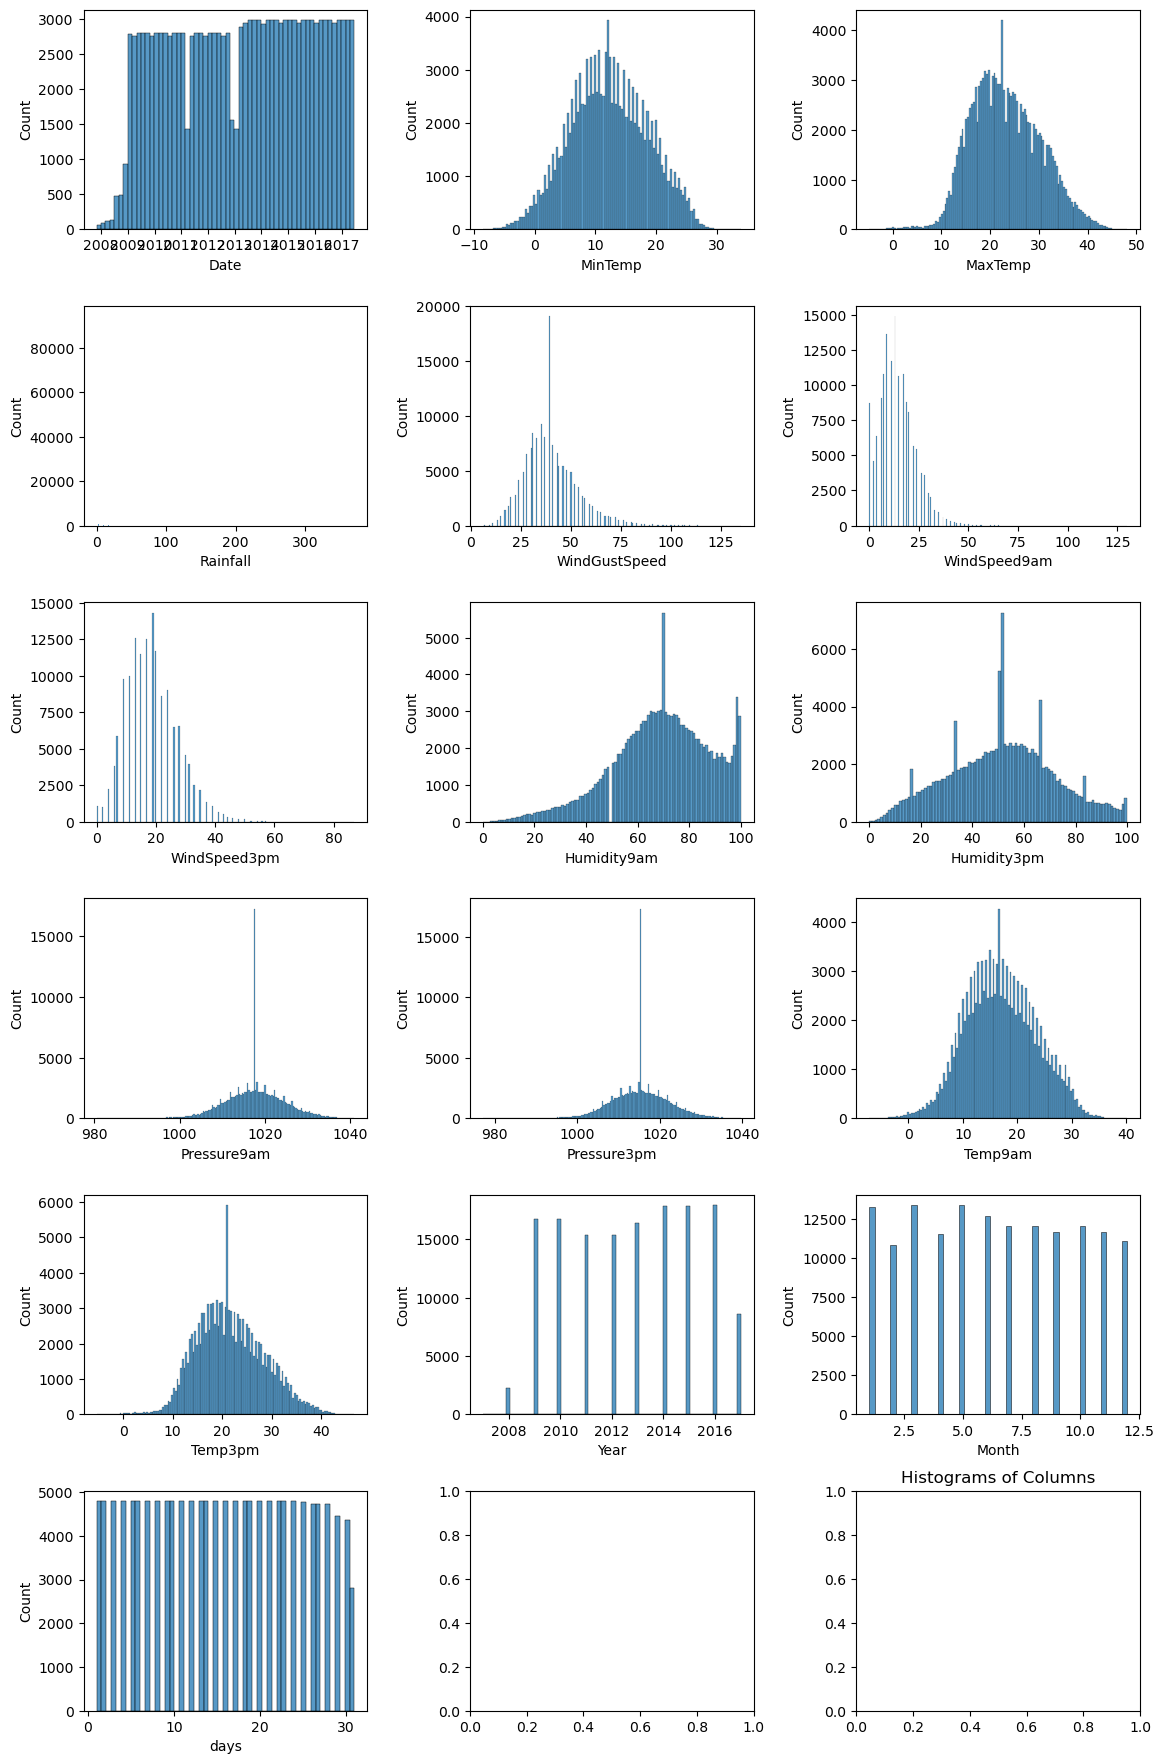

In [143]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(12, 18))
axes = axes.reshape(-1)

continuous = [col for col in df_rainfall.columns if df_rainfall[col].dtype != object]
for i, col in enumerate(continuous):
    sns.histplot(df_rainfall[col], ax=axes[i])

fig.tight_layout(pad=2.0)
plt.title('Histograms of Columns')
plt.show()

<AxesSubplot:>

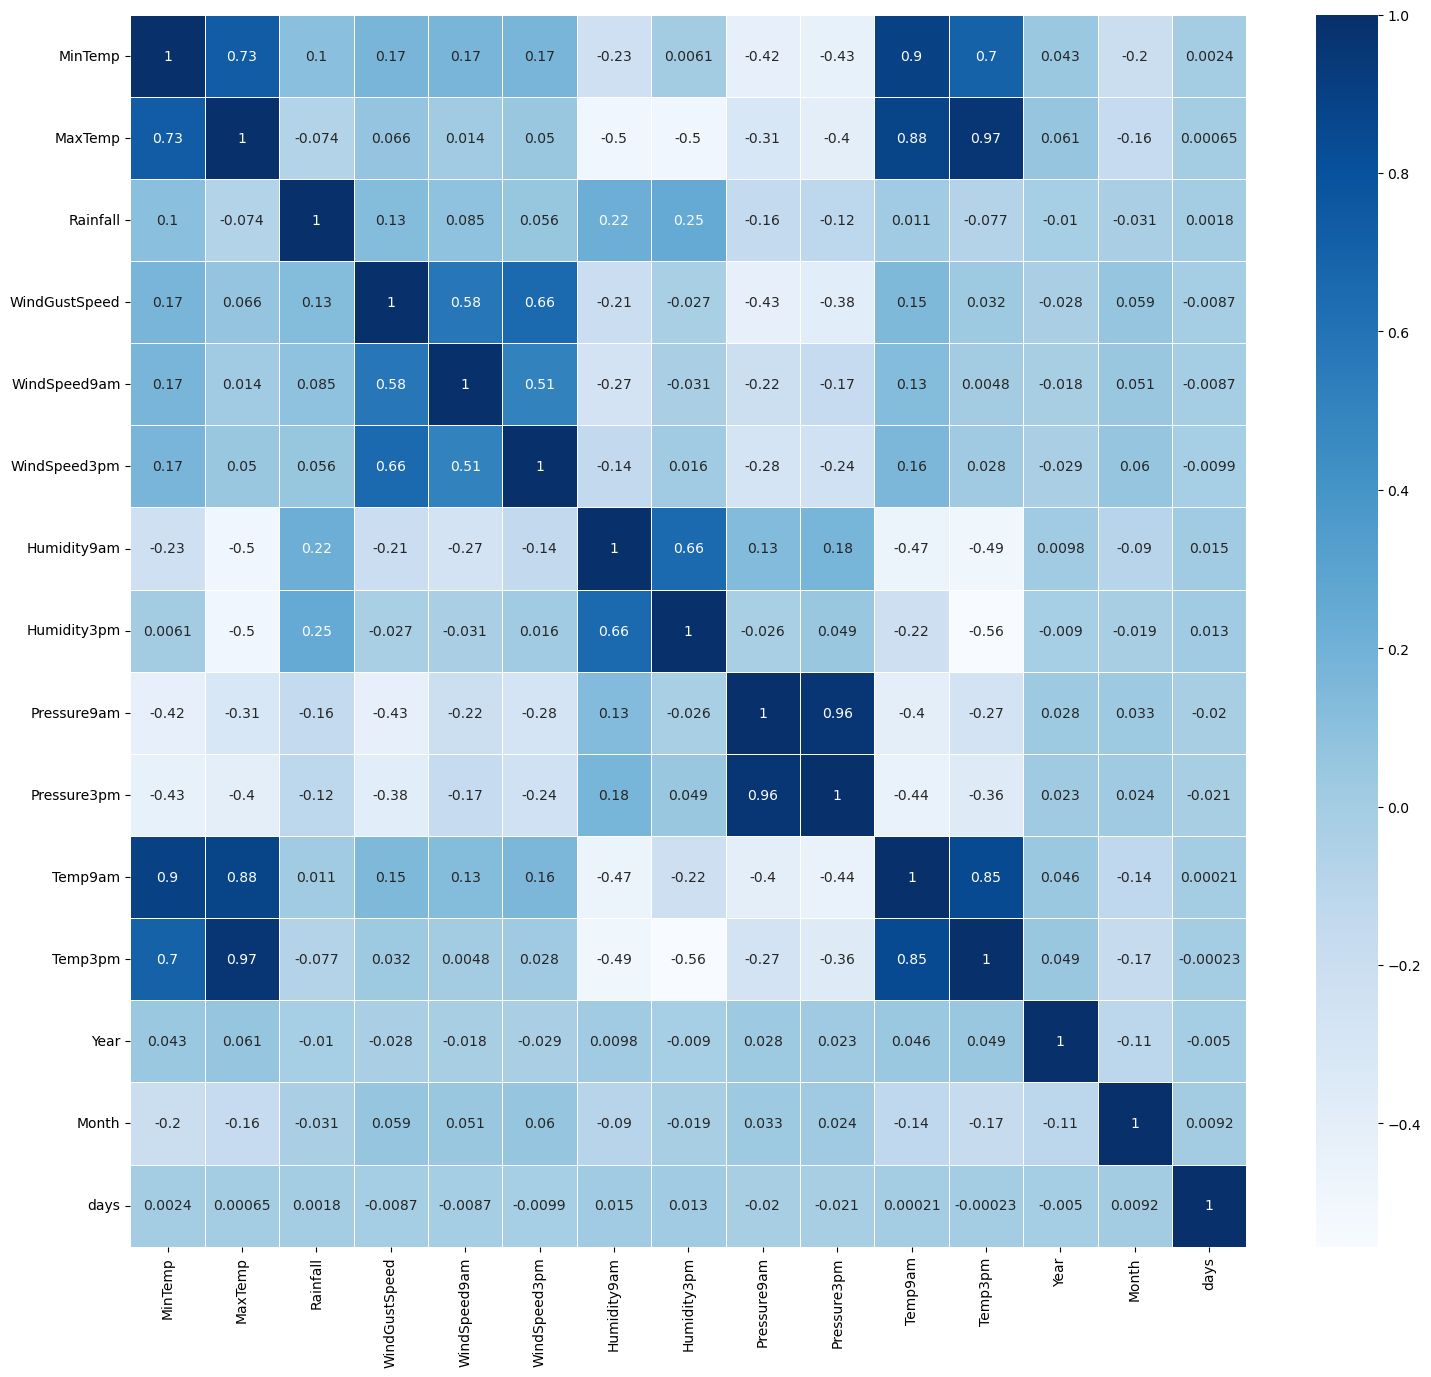

In [145]:
plt.figure(figsize=(18,16))
sns.heatmap(df_rainfall.corr(),annot=True,linewidth=.5,cmap='Blues')

Text(0.5, 0, 'Temperatute deg celcius')

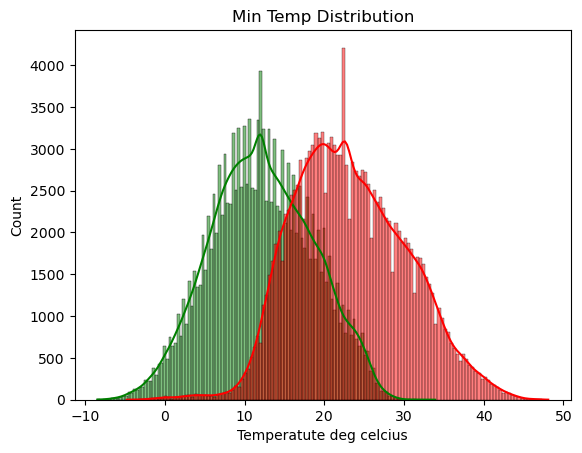

In [187]:

ax=sns.histplot(df_rainfall['MinTemp'],kde=True,color='Green')
ax.set_title('Min Temp Distribution')
ax=sns.histplot(df_rainfall['MaxTemp'],kde=True,color='Red')
plt.xlabel('Temperatute deg celcius')

Text(0.5, 0, 'Wind Speed in km/hr')

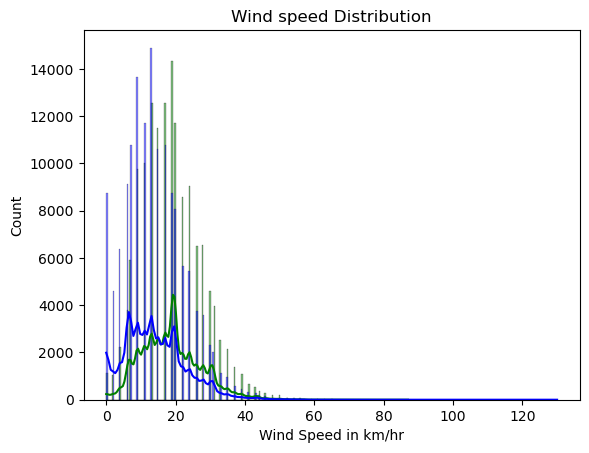

In [180]:

ax=sns.histplot(df_rainfall['WindSpeed3pm'],kde=True,color='green')
ax.set_title('Wind speed Distribution')
ax=sns.histplot(df_rainfall['WindSpeed9am'],kde=True,color='blue')
plt.xlabel('Wind Speed in km/hr')



Text(0.5, 0, 'Wind Speed')

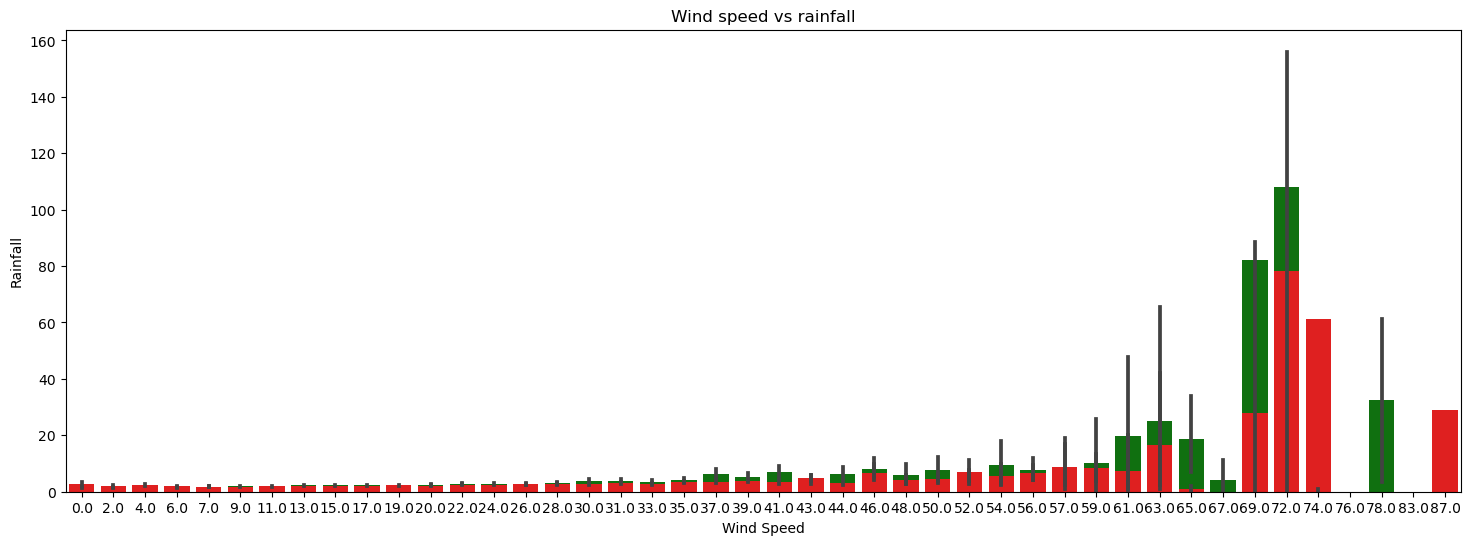

In [168]:
plt.figure(figsize=(18,6))
ax=sns.barplot(x=df_rainfall['WindSpeed9am'],y=df_rainfall['Rainfall'],color='Green')
ax.set_title('Wind speed vs rainfall')
ax=sns.barplot(x=df_rainfall['WindSpeed3pm'],y=df_rainfall['Rainfall'],color='Red')
plt.xlabel('Wind Speed')


Text(0.5, 0, 'Humidity g/m3')

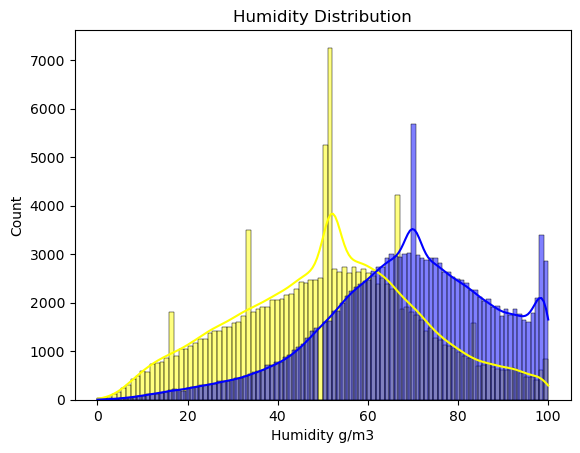

In [185]:
ax=sns.histplot(df_rainfall['Humidity3pm'],kde=True,color='yellow')
ax.set_title('Humidity Distribution')
ax=sns.histplot(df_rainfall['Humidity9am'],kde=True,color='blue')
plt.xlabel('Humidity g/m3')


Text(0.5, 0, 'Pressure mm/hg')

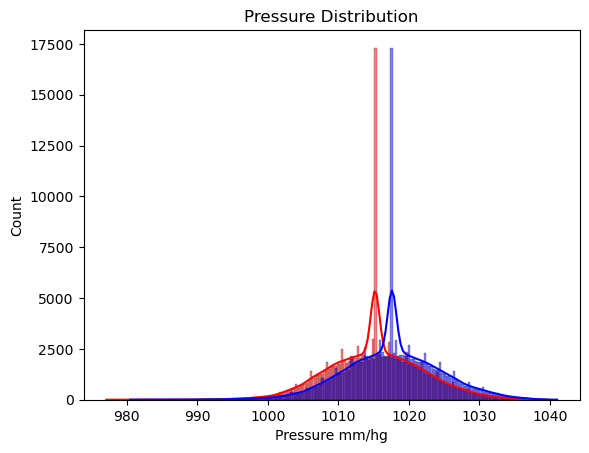

In [186]:
ax=sns.histplot(df_rainfall['Pressure3pm'],kde=True,color='red')
ax.set_title('Pressure Distribution')
ax=sns.histplot(df_rainfall['Pressure9am'],kde=True,color='blue')
plt.xlabel('Pressure mm/hg')